In [2]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [6]:
# Sample versus population example fuel economy
fuel_economy = pd.read_csv('../Resources/2019_fuel_economy.csv')

# First overview the data set - how many factors, etc.
fuel_economy.tail()

,Type,Combined_MPG,Make_Model
1237,Standard SUV 4WD,14.9298,TOYOTA_LAND CRUISER WAGON 4WD
1238,Standard SUV 4WD,14.4037,TOYOTA_SEQUOIA 4WD
1239,Standard SUV 4WD,19.2827,Volkswagen_Atlas 4Motion
1240,Standard SUV 4WD,22.0007,"Volvo Cars of North America, LLC_XC90 AWD"
1241,Standard SUV 4WD,22.7494,"Volvo Cars of North America, LLC_XC90 AWD"


The mean MPG of all vehicles is: 23.33
The standard deviation of all vehicle's MPG is: 5.94


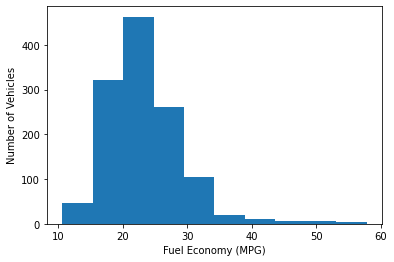

In [4]:
# Calculate the summary statistics and plot the histogram of the entire population data
print(f"The mean MPG of all vehicles is: {round(fuel_economy['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(fuel_economy.Combined_MPG.std(),2)}")
plt.hist(fuel_economy.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 18.48
The standard deviation of all vehicle's MPG is: 2.41


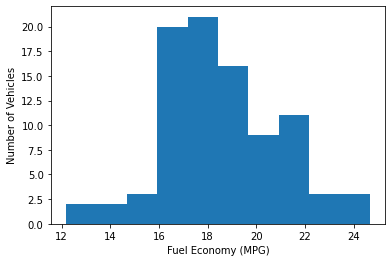

In [7]:
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = fuel_economy.iloc[range(766,856)]
print(f"The mean MPG of all vehicles is: {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

In [10]:
subset

,Type,Combined_MPG,Make_Model
570,Midsize Cars,52.3985,TOYOTA_PRIUS
271,Compact Cars,24.1723,BMW_440i xDrive Gran Coupe
484,Midsize Cars,44.1781,LEXUS_ES 300h
372,Compact Cars,46.2114,TOYOTA_PRIUS c
658,Large Cars,20.9537,Lincoln_CONTINENTAL FWD
...,...,...,...
892,"Special Purpose Vehicle, minivan 2WD",21.9345,Honda_ODYSSEY FWD
259,Compact Cars,29.6146,BMW_330i
838,Standard Pick-up Trucks 4WD,17.4563,GMC_K10 SIERRA 4WD
1213,Standard SUV 4WD,13.8444,Mercedes-Benz_AMG G 63


The mean MPG of all vehicles is: 24.72
The standard deviation of all vehicle's MPG is: 6.42


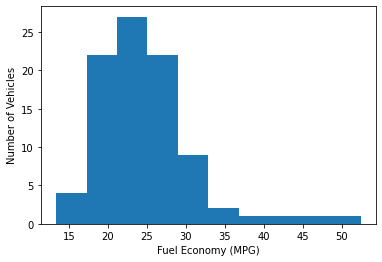

In [9]:
# Calculate the summary statistics and plot the histogram of the sample data using random sampling
subset = fuel_economy.sample(90)
print(f"The mean MPG of all vehicles is: {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

In [11]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(30)
print(f"The SEM value for the sample fuel economy data is {sem(sample.Combined_MPG)}")

The SEM value for the sample fuel economy data is 1.0038107998350672


In [13]:
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_economy.sample(30) for x in range(0,10)]
vehicle_sample_set

[                             Type  Combined_MPG  \
 1181             Standard SUV 4WD       16.4284   
 20                    Two Seaters       29.6662   
 456                  Midsize Cars       29.4374   
 298                  Compact Cars       20.2749   
 1053                Small SUV 4WD       20.8363   
 651                    Large Cars       30.5243   
 910                 Small SUV 2WD       28.0161   
 1111             Standard SUV 2WD       17.1741   
 969                 Small SUV 2WD       21.5538   
 962                 Small SUV 2WD       27.3502   
 936                 Small SUV 2WD       22.3020   
 925                 Small SUV 2WD       22.3536   
 1170             Standard SUV 4WD       20.7213   
 767   Standard Pick-up Trucks 2WD       16.8203   
 1141             Standard SUV 2WD       15.9619   
 121              Minicompact Cars       22.3791   
 718          Small Station Wagons       25.1898   
 266                  Compact Cars       25.0797   
 1088       

In [14]:
# Generate the plot data for each sample 
means = [sample.Combined_MPG.mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample.Combined_MPG) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

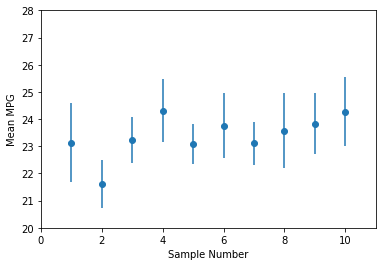

In [15]:
# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean MPG")
plt.show()